In [1]:
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline
from matplotlib import style
import matplotlib.font_manager as font_manager
import pandas as pd
import pandas_datareader.data as web
import quandl
from sklearn import preprocessing
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()

## Enter desired start and end dates

In [2]:
start = dt.datetime(2017, 3, 31)
end = dt.datetime.now()
num_months = (end.year - start.year) * 12 + (end.month - start.month)
print('Number of months in range:', num_months)

Number of months in range: 37


## Enter desired tickers

In [3]:
Long_Numerator = "TSLA" # Enter whatever stocks you want to view
Short_Denominator = "F"

In [4]:
df_SP500 = web.DataReader("^GSPC", 'yahoo', start, end)
df_SP500.rename(columns={'Adj Close': "SP500"}, inplace=True)
df_SP500.drop(['Open', 'High', 'Low', 'Close', 'Volume'], 1, inplace=True)

In [5]:
#Long Stock
df_long = web.DataReader(Long_Numerator, 'yahoo', start, end)
df_long = df_long[::-1] #Need this or ATR will be off
df_long.rename(columns={'Adj Close': Long_Numerator}, inplace=True)
df_long.drop(['Close', 'Volume'], 1, inplace=True)
df_long['True_Range'] = df_long['High'] - df_long['Low']

#Short Stock
df_short = web.DataReader(Short_Denominator, 'yahoo', start, end)
df_short = df_short[::-1]
df_short.rename(columns={'Adj Close': Short_Denominator}, inplace=True)
df_short.drop(['Close', 'Volume'], 1, inplace=True)
df_short['True_Range'] = df_short['High'] - df_short['Low']

### Average True Range

In [6]:
df_long['1d'] = df_long['True_Range']
for i in range(df_long.shape[0] - 1):
    df_long['1d'][i] = (((df_long['True_Range'][i] + df_long['True_Range'][i+1]) / 2) / df_long['Open'][i+1])

df_short['1d'] = df_short['True_Range']
for i in range(df_long.shape[0] - 1):
    df_short['1d'][i] = (((df_short['True_Range'][i] + df_short['True_Range'][i+1]) / 2) / df_short['Open'][i+1])
    
df_long.head(10)

,High,Low,Open,TSLA,True_Range,1d
Date,,,,,,
2020-04-03,515.489990,479.054688,509.500000,481.963409,36.435303,0.087620
2020-04-02,494.260010,446.399994,481.029999,454.470001,47.860016,0.086022
2020-04-01,513.950012,475.100006,504.000000,481.559998,38.850006,0.084599
2020-03-31,542.960022,497.000000,501.250000,524.000000,45.960022,0.069945
2020-03-30,516.650024,491.230011,510.260010,502.130005,25.420013,0.056624
2020-03-27,525.799988,494.029999,505.000000,514.359985,31.769989,0.072636
2020-03-26,560.000000,512.250000,547.390015,528.159973,47.750000,0.085869
2020-03-25,557.000000,511.109985,545.250000,539.250000,45.890015,0.089650
2020-03-24,513.690002,474.000000,477.299988,505.000000,39.690002,0.082092


In [7]:
df_short.head(10)

,High,Low,Open,F,True_Range,1d
Date,,,,,,
2020-04-03,4.42,4.21,4.40,4.2146,0.21,0.060364
2020-04-02,4.57,4.25,4.39,4.3600,0.32,0.078834
2020-04-01,4.77,4.36,4.63,4.4000,0.41,0.084493
2020-03-31,5.19,4.75,5.03,4.8300,0.44,0.061644
2020-03-30,5.12,4.93,5.11,5.0300,0.19,0.057199
2020-03-27,5.30,4.91,5.07,5.1900,0.39,0.082090
2020-03-26,5.65,5.16,5.36,5.2500,0.49,0.107452
2020-03-25,5.87,5.12,5.77,5.3900,0.75,0.165548
2020-03-24,4.99,4.26,4.47,4.9500,0.73,0.151054


In [8]:
ATR_5d = 0
ATR_20d = 0
ATR_60d = 0
ATR_250d = 0
ATR_750d = 0

for i in range(0,5): ATR_5d = ATR_5d + df_long['1d'][i]
for i in range(0,20): ATR_20d = ATR_20d + df_long['1d'][i]
for i in range(0,60): ATR_60d = ATR_60d + df_long['1d'][i]
for i in range(0,250): ATR_250d = ATR_250d + df_long['1d'][i]
for i in range(0,750): ATR_750d = ATR_750d + df_long['1d'][i]
    
print("+++++++++++++++++++++++++++++++++++++++++++++")
print(Long_Numerator, " Average True Range")
print("+++++++++++++++++++++++++++++++++++++++++++++")
print("5d ATR:\t\t\t", ATR_5d/5)
print("20d ATR:\t\t", ATR_20d/20)
print("60d ATR:\t\t", ATR_60d/60)
print("250d ATR:\t\t", ATR_250d/250)
print("750d ATR:\t\t", ATR_750d/750)
print("Standard deviation:\t", df_long[Long_Numerator].std(), '\n')

ATR_5d = 0
ATR_20d = 0
ATR_60d = 0
ATR_250d = 0
ATR_750d = 0

for i in range(0,5): ATR_5d = ATR_5d + df_short['1d'][i]
for i in range(0,20): ATR_20d = ATR_20d + df_short['1d'][i]
for i in range(0,60): ATR_60d = ATR_60d + df_short['1d'][i]
for i in range(0,250): ATR_250d = ATR_250d + df_short['1d'][i]
for i in range(0,750): ATR_750d = ATR_750d + df_short['1d'][i]
    
print("+++++++++++++++++++++++++++++++++++++++++++++")
print(Short_Denominator, " Average True Range")
print("+++++++++++++++++++++++++++++++++++++++++++++")
print("5d ATR:\t\t\t", ATR_5d/5)
print("20d ATR:\t\t", ATR_20d/20)
print("60d ATR:\t\t", ATR_60d/60)
print("250d ATR:\t\t", ATR_250d/250)
print("750d ATR:\t\t", ATR_750d/750)
print("Standard deviation:\t", df_short[Short_Denominator].std(), '\n')

+++++++++++++++++++++++++++++++++++++++++++++
TSLA  Average True Range
+++++++++++++++++++++++++++++++++++++++++++++
5d ATR:			 0.07696170356758332
20d ATR:		 0.10222619511182018
60d ATR:		 0.07751978618803791
250d ATR:		 0.043865823552694964
750d ATR:		 0.03860897631393006
Standard deviation:	 106.08333005276207 

+++++++++++++++++++++++++++++++++++++++++++++
F  Average True Range
+++++++++++++++++++++++++++++++++++++++++++++
5d ATR:			 0.06850686127983022
20d ATR:		 0.09070310098685305
60d ATR:		 0.045191253945789635
250d ATR:		 0.024977457438862285
750d ATR:		 0.021525126483606268
Standard deviation:	 1.1191870213553994 



In [9]:
df_long.drop(['High', 'Low', 'Open', 'True_Range', '1d'], 1, inplace=True)
df_short.drop(['High', 'Low', 'Open', 'True_Range', '1d'], 1, inplace=True)

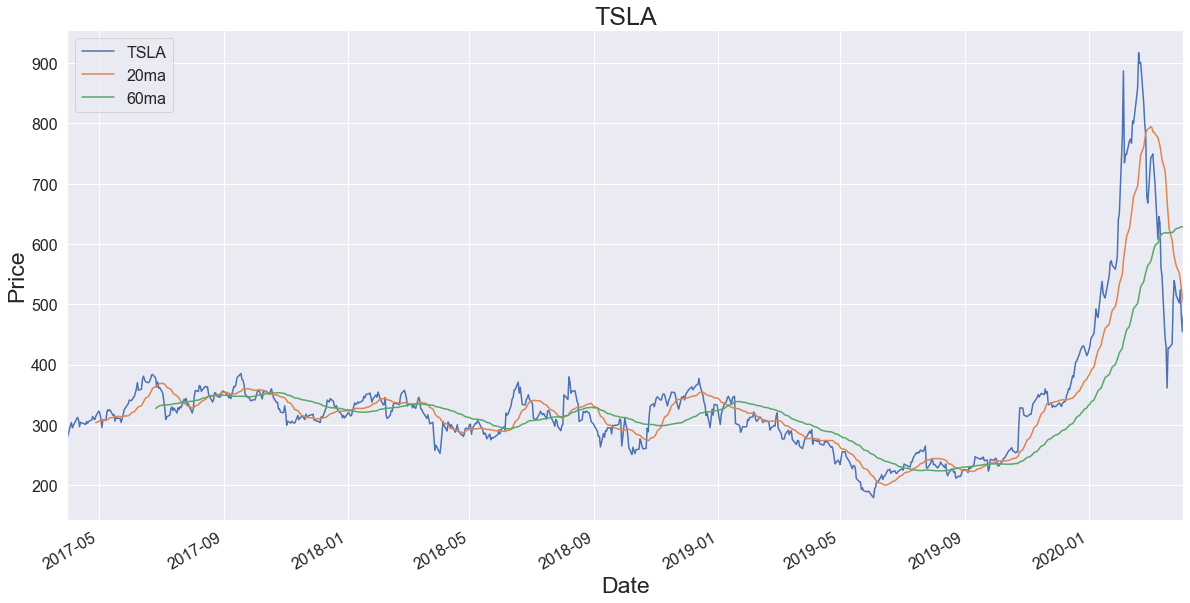

In [10]:
df_long = df_long[::-1]
df_long['20ma'] = df_long[Long_Numerator].rolling(window=20).mean()
df_long['60ma'] = df_long[Long_Numerator].rolling(window=60).mean()
df_long.plot(figsize=(20, 10))
plt.xlabel("Date", fontsize=23)
plt.ylabel("Price", fontsize=23)
plt.title(Long_Numerator, fontsize=25)
plt.tick_params(labelsize=16)
plt.legend(fontsize=16)
plt.show();

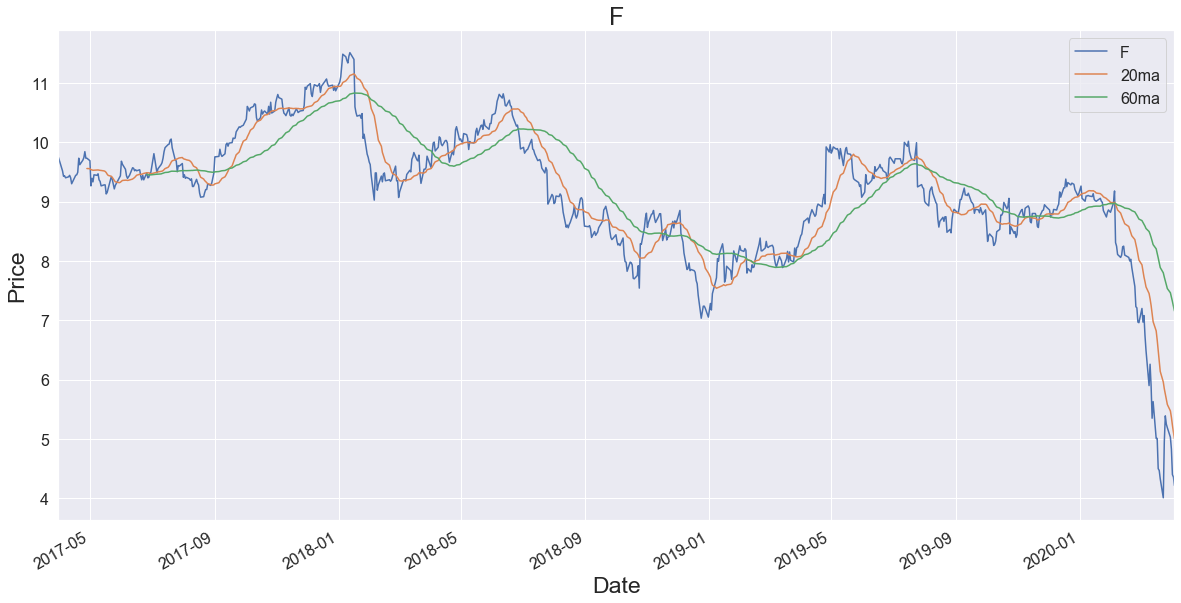

In [11]:
df_short = df_short[::-1]
df_short['20ma'] = df_short[Short_Denominator].rolling(window=20).mean()
df_short['60ma'] = df_short[Short_Denominator].rolling(window=60).mean()
df_short.plot(figsize=(20, 10))
plt.xlabel("Date", fontsize=23)
plt.ylabel("Price", fontsize=23)
plt.title(Short_Denominator, fontsize=25)
plt.tick_params(labelsize=16)
plt.legend(fontsize=16)
plt.show();

### Beta Hedge

In [12]:
df_long.drop(['20ma', '60ma'], 1, inplace=True)
df_short.drop(['20ma', '60ma'], 1, inplace=True)
df_ratio = df_long.merge(df_short, left_on='Date', right_on='Date')

In [13]:
df = df_ratio.merge(df_SP500, left_on='Date', right_on='Date')
df.rename(columns={'SP500': 'SPY'}, inplace=True)

stock_return = df.apply(lambda x: x / x[0])
stock_change = df.apply(lambda x: np.log(x) - np.log(x.shift(1)))
stock_change_apr = stock_change * 252 * 100    # There are 252 trading days in a year; the 100 converts to percentages

tbill = quandl.get("FRED/TB3MS", start_date=start, end_date=end, authtoken="kFwyRwmqZyPsHBzdpNov")
rrf = tbill.iloc[-1, 0]    # Get the most recent Treasury Bill rate
smcorr = stock_change_apr.drop("SPY", 1).corrwith(stock_change_apr.SPY)

sy = stock_change_apr.drop("SPY", 1).std()
sx = stock_change_apr.SPY.std()

ybar = stock_change_apr.drop("SPY", 1).mean() - rrf
xbar = stock_change_apr.SPY.mean() - rrf

beta = smcorr * sy / sx
alpha = ybar - beta * xbar

In [14]:
long_beta = beta[Long_Numerator]
short_beta = beta[Short_Denominator]
print(Long_Numerator,'beta:',long_beta) # Note: both betas are calculated based on the dates specified at the top
print(Short_Denominator,'beta:',short_beta)

TSLA beta: 1.1932901258365134
F beta: 0.9777038103854413


In [15]:
df_ratio['Ratio'] = (df_ratio[Long_Numerator] / long_beta) / (df_ratio[Short_Denominator] / short_beta)
df_ratio.drop([Long_Numerator, Short_Denominator], 1, inplace=True)

In [16]:
df_ratio.head()

,Ratio
Date,
2017-03-31,23.398539
2017-04-03,25.537361
2017-04-04,26.140439
2017-04-05,25.639650
2017-04-06,25.938197


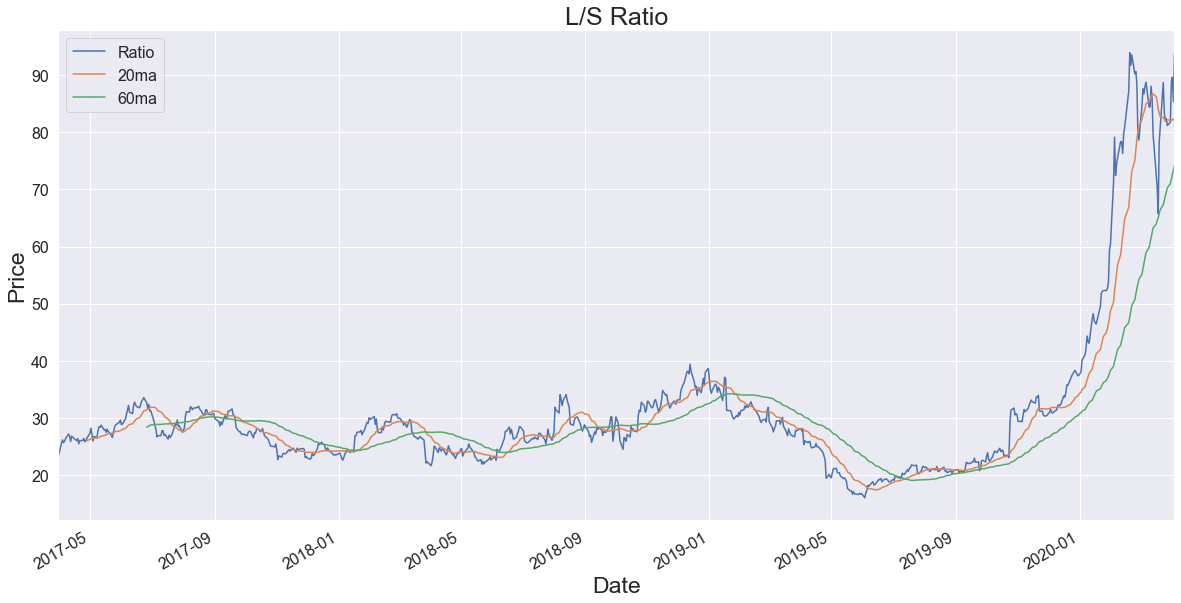

In [17]:
df_ratio['20ma'] = df_ratio['Ratio'].rolling(window=20).mean()
df_ratio['60ma'] = df_ratio['Ratio'].rolling(window=60).mean()
df_ratio.plot(figsize=(20, 10))
plt.xlabel("Date", fontsize=23)
plt.ylabel("Price", fontsize=23)
plt.title("L/S Ratio", fontsize=25)
plt.tick_params(labelsize=16)
plt.legend(fontsize=16)
plt.show();

## Daily Returns

In [18]:
long_daily_returns = df_long[Long_Numerator].pct_change()

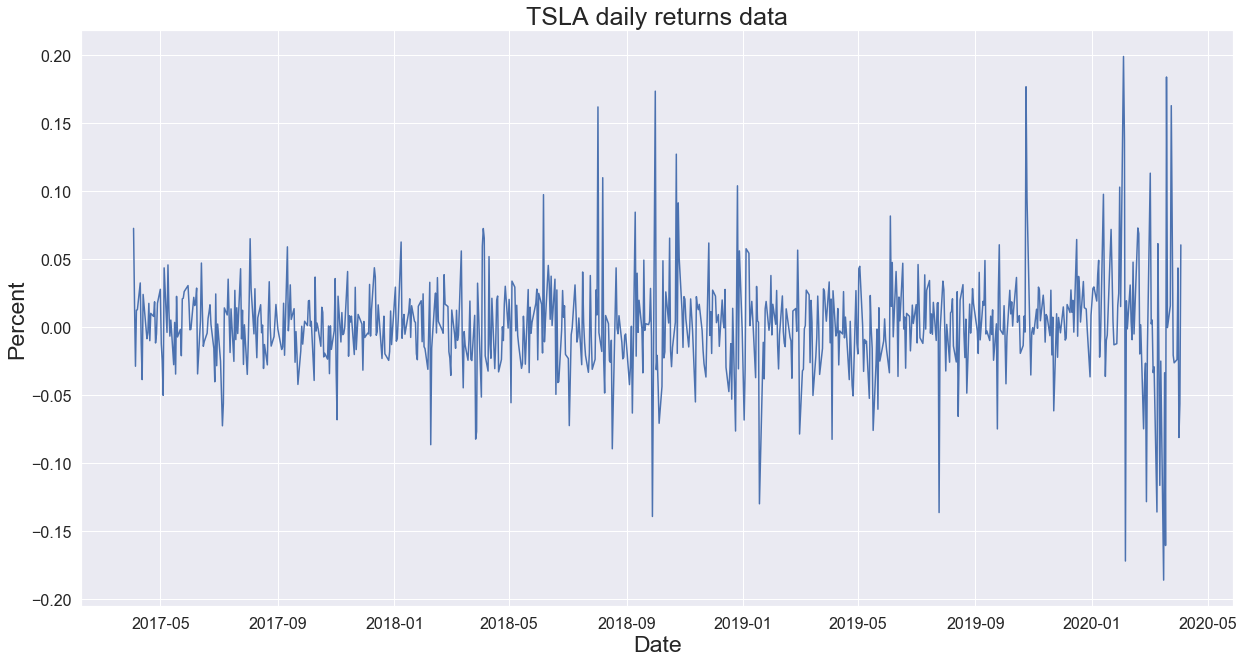

In [19]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(long_daily_returns)
ax1.set_xlabel("Date", fontsize=23)
ax1.set_ylabel("Percent", fontsize=23)
ax1.set_title(Long_Numerator + " daily returns data", fontsize=25)
plt.tick_params(labelsize=16)
plt.show();

In [20]:
long_std = long_daily_returns.std()

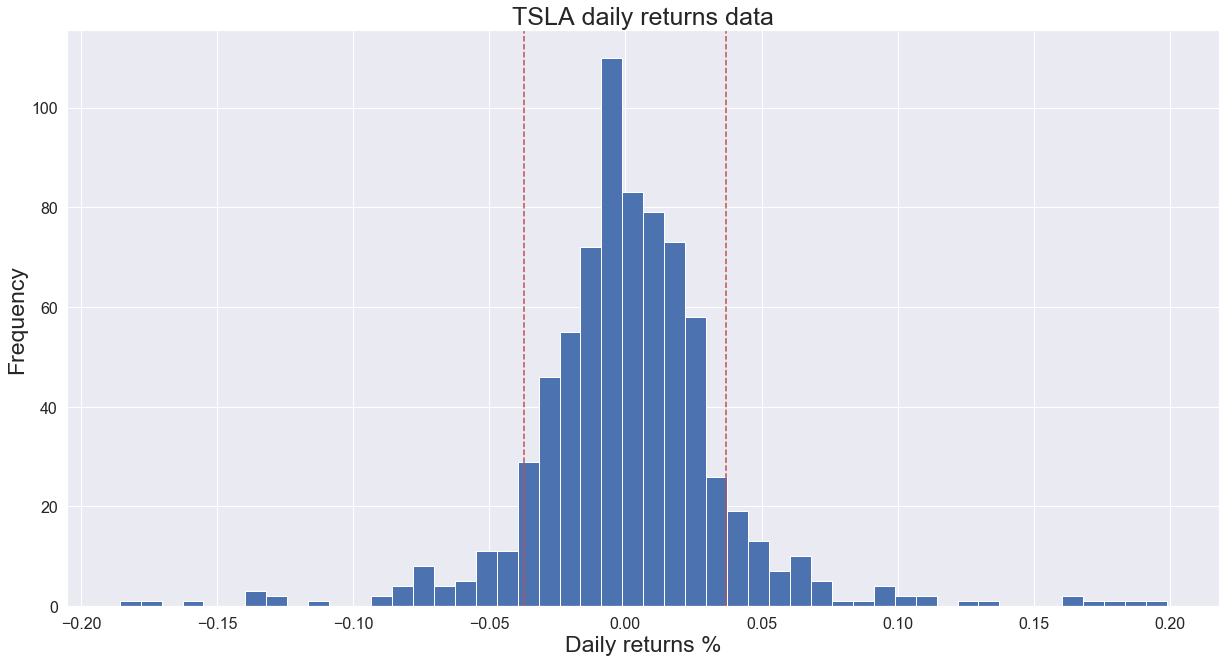

In [21]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
long_daily_returns.plot.hist(bins = 50)
ax1.set_xlabel("Daily returns %", fontsize=23)
ax1.set_ylabel("Frequency", fontsize=23)
ax1.set_title(Long_Numerator + " daily returns data", fontsize=25)
plt.tick_params(labelsize=16)

# The red dotted lines are +/- 1 std 
plt.axvline(long_std, color='r', linestyle='dashed')
plt.axvline(-long_std, color='r', linestyle='dashed')

plt.show()

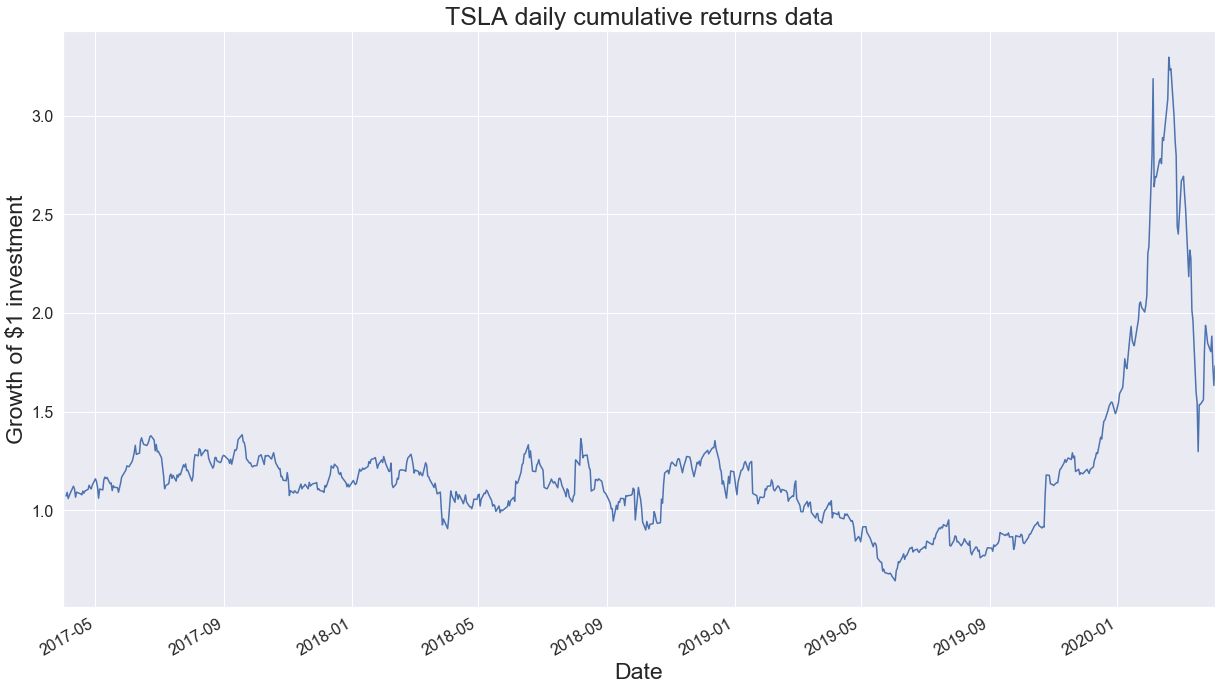

In [22]:
long_cum_returns = (long_daily_returns + 1).cumprod()
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
long_cum_returns.plot()
ax1.set_xlabel("Date", fontsize=23)
ax1.set_ylabel("Growth of $1 investment", fontsize=23)
ax1.set_title(Long_Numerator + " daily cumulative returns data", fontsize=25)
plt.tick_params(labelsize=16)
plt.show();

In [23]:
short_daily_returns = df_short[Short_Denominator].pct_change()

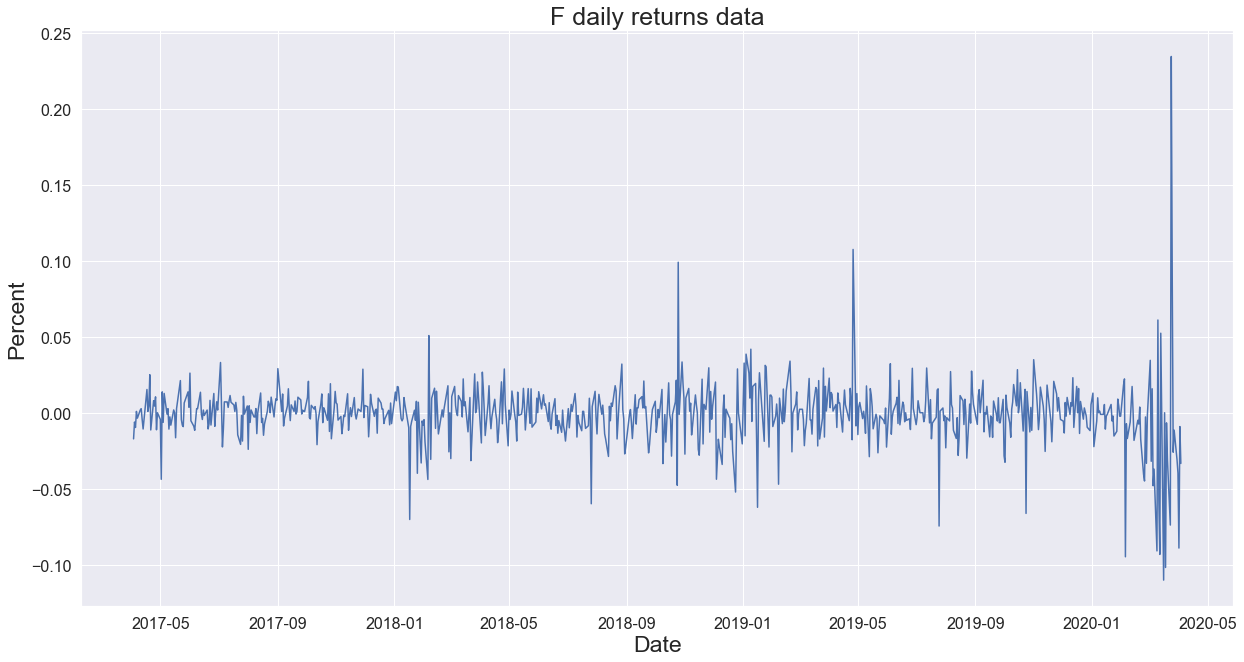

In [24]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.plot(short_daily_returns)
ax1.set_xlabel("Date", fontsize=23)
ax1.set_ylabel("Percent", fontsize=23)
ax1.set_title(Short_Denominator + " daily returns data", fontsize=25)
plt.tick_params(labelsize=16)
plt.show();

In [25]:
short_std = short_daily_returns.std()

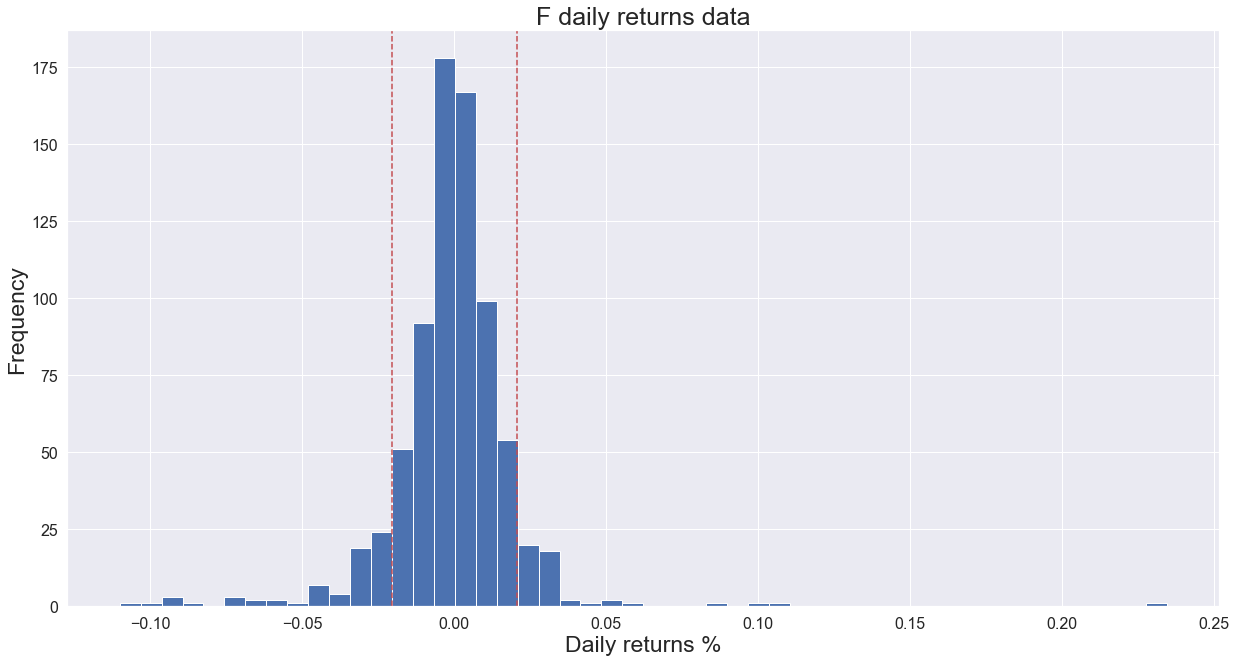

In [26]:
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
short_daily_returns.plot.hist(bins = 50)
ax1.set_xlabel("Daily returns %", fontsize=23)
ax1.set_ylabel("Frequency", fontsize=23)
ax1.set_title(Short_Denominator + " daily returns data", fontsize=25)
plt.tick_params(labelsize=16)

# The red dotted lines are +/- 1 std 
plt.axvline(short_std, color='r', linestyle='dashed')
plt.axvline(-short_std, color='r', linestyle='dashed')

plt.show()

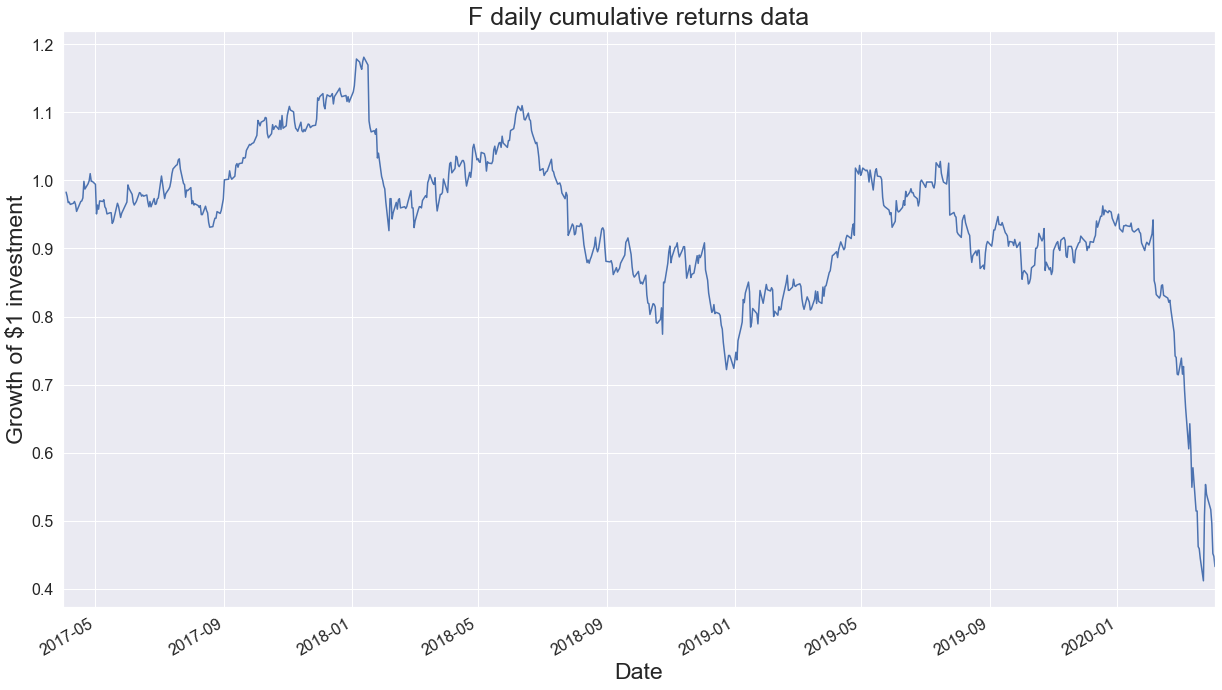

In [27]:
short_cum_returns = (short_daily_returns + 1).cumprod()
fig = plt.figure(figsize=(20, 10))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
short_cum_returns.plot()
ax1.set_xlabel("Date", fontsize=23)
ax1.set_ylabel("Growth of $1 investment", fontsize=23)
ax1.set_title(Short_Denominator + " daily cumulative returns data", fontsize=25)
plt.tick_params(labelsize=16)
plt.show();